In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import nltk
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
import string

In [2]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [3]:
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM, Bidirectional

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.layers import TextVectorization

## Bags of words embedding

In [6]:
dt = pd.read_csv('train.csv',encoding ='utf-8')

In [7]:
#english x
x = dt.premise.values +' '+ dt.hypothesis.values
#english y 
y = dt.label.values
# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
y_train

array([1, 0, 2, ..., 2, 2, 0], dtype=int64)

In [9]:
X_train_tok = [word_tokenize(sentence) for sentence in x_train]
X_train_tok = [[word.lower() for word in s]for s in X_train_tok]
X_train_tok = [[word for word in s if word.isalpha()]for s in X_train_tok]

In [10]:
text = []
for l in X_train_tok:
    for i in l:
        text.append(i)

In [11]:
text = set(text)
text1 =list(text)

In [12]:
# Model constants.
max_features = len(text1)+2
embedding_dim = 128
sequence_length = 100


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#vectorize_layer.adapt(x_train)

In [13]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'ahadi',
 'verbrennen',
 'asili',
 'best',
 'taşımız',
 'botánica',
 'плажа',
 'ескалира',
 'onwards',
 'hại',
 'λας',
 'предложи',
 'كما',
 'vuelo',
 'сладости',
 'refugees',
 'beispielsweise',
 'scutari',
 'kịch',
 'khoj',
 'σκεφτεί',
 'bazlı',
 'pequeño',
 'سب',
 'этимологию',
 'güçlü',
 'skit',
 'offizieller',
 'لذا',
 'kanıtlayabilirdim',
 'uliofanyika',
 'gebe',
 'انها',
 'muazzam',
 'regain',
 'pepper',
 'promote',
 'botschaft',
 'σχέσης',
 'processing',
 'gaulle',
 'nikimfuatilia',
 'الاستئماني',
 'franca',
 'خصوم',
 'status',
 'straight',
 'regaining',
 'أسماء',
 'للشكل',
 'acht',
 'реакция',
 'sufficiently',
 'rozi',
 'торонто',
 'fare',
 'mapaches',
 'extraordinarily',
 'выступлению',
 'abdicating',
 'heridas',
 'aynı',
 'liking',
 'puuc',
 'lady',
 'semaines',
 'hazırladı',
 'pequeña',
 'hạng',
 'trump',
 'garlands',
 'кули',
 'homme',
 'incorrigible',
 'burgundy',
 'έδειξε',
 'bruce',
 'inanış',
 'дума',
 'montmarte',
 'семинаров',
 'تظهر',
 'pouvais',
 'se

In [14]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)

In [15]:
X_train

<tf.Tensor: shape=(8484, 100), dtype=int64, numpy=
array([[    1,     1, 34683, ...,     0,     0,     0],
       [25983,  9521,  1832, ...,     0,     0,     0],
       [ 3520, 35675, 25589, ...,     0,     0,     0],
       ...,
       [20048, 29869,     1, ...,     0,     0,     0],
       [16496,  5215,  6691, ...,     0,     0,     0],
       [    1,     1, 25727, ...,     0,     0,     0]], dtype=int64)>

In [16]:
# Convert y to OHE 
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [17]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(100,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.1)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.1)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
cnn = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 18s 81ms/step - loss: 1.0994 - accuracy: 0.3399 - val_loss: 1.0979 - val_accuracy: 0.3506
Epoch 2/3
213/213 [==============================] - 17s 80ms/step - loss: 1.0672 - accuracy: 0.4364 - val_loss: 1.1489 - val_accuracy: 0.3082
Epoch 3/3
213/213 [==============================] - 17s 81ms/step - loss: 0.5825 - accuracy: 0.7523 - val_loss: 1.6108 - val_accuracy: 0.2982


In [19]:
cnn_pred = np.round(model.predict(X_test))

114/114 [==============================] - 1s 5ms/step


In [20]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.1806930693069307
F1-score [0.18164436 0.17168339 0.28059166]
Classification report:
              precision    recall  f1-score   support

           0       0.22      0.15      0.18      1237
           1       0.24      0.13      0.17      1147
           2       0.32      0.25      0.28      1252

   micro avg       0.26      0.18      0.21      3636
   macro avg       0.26      0.18      0.21      3636
weighted avg       0.26      0.18      0.21      3636
 samples avg       0.18      0.18      0.18      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
input = Input(shape=(100,), dtype="int64") 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
cnn1 = model1.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 17s 76ms/step - loss: 1.0999 - accuracy: 0.3405 - val_loss: 1.0989 - val_accuracy: 0.3247
Epoch 2/3
213/213 [==============================] - 16s 77ms/step - loss: 1.0843 - accuracy: 0.4052 - val_loss: 1.1013 - val_accuracy: 0.3542
Epoch 3/3
213/213 [==============================] - 16s 75ms/step - loss: 0.9152 - accuracy: 0.5969 - val_loss: 1.2418 - val_accuracy: 0.3382


In [23]:
cnn_pred1 = np.round(model1.predict(X_test))

114/114 [==============================] - 0s 4ms/step


In [24]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred1))
print('F1-score %s' % f1_score(y_test, cnn_pred1,average=None,zero_division = 0))
print('Classification report:')
print(classification_report(y_test, cnn_pred1))

Accuracy 0.1773927392739274
F1-score [0.18498943 0.14087899 0.32474701]
Classification report:
              precision    recall  f1-score   support

           0       0.27      0.14      0.18      1237
           1       0.23      0.10      0.14      1147
           2       0.38      0.28      0.32      1252

   micro avg       0.31      0.18      0.23      3636
   macro avg       0.29      0.18      0.22      3636
weighted avg       0.29      0.18      0.22      3636
 samples avg       0.18      0.18      0.18      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [25]:
input = Input(shape=(sequence_length, )) 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [26]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
lstm = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 30s 133ms/step - loss: 1.0993 - accuracy: 0.3371 - val_loss: 1.0975 - val_accuracy: 0.3659
Epoch 2/3
213/213 [==============================] - 26s 122ms/step - loss: 1.0615 - accuracy: 0.4593 - val_loss: 1.1084 - val_accuracy: 0.3807
Epoch 3/3
213/213 [==============================] - 27s 125ms/step - loss: 0.7710 - accuracy: 0.6626 - val_loss: 1.3865 - val_accuracy: 0.3235


In [28]:
lstm_pred = np.round(model.predict(X_test))

114/114 [==============================] - 3s 19ms/step


In [29]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.2048954895489549
F1-score [0.25165563 0.14973262 0.31288056]
Classification report:
              precision    recall  f1-score   support

           0       0.28      0.23      0.25      1237
           1       0.24      0.11      0.15      1147
           2       0.38      0.27      0.31      1252

   micro avg       0.30      0.20      0.24      3636
   macro avg       0.30      0.20      0.24      3636
weighted avg       0.30      0.20      0.24      3636
 samples avg       0.20      0.20      0.20      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
inputs = Input(shape=(sequence_length,))
# Embed each integer in a 128-dimensional vector
x = Embedding(max_features, embedding_dim)(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
lstm = model.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 56s 225ms/step - loss: 1.0996 - accuracy: 0.3342 - val_loss: 1.0981 - val_accuracy: 0.3506
Epoch 2/10
213/213 [==============================] - 44s 206ms/step - loss: 1.0872 - accuracy: 0.3950 - val_loss: 1.1203 - val_accuracy: 0.2917
Epoch 3/10
213/213 [==============================] - 45s 210ms/step - loss: 0.8748 - accuracy: 0.5926 - val_loss: 1.4321 - val_accuracy: 0.2640
Epoch 4/10
213/213 [==============================] - 45s 214ms/step - loss: 0.6127 - accuracy: 0.7077 - val_loss: 1.9091 - val_accuracy: 0.2569
Epoch 5/10
213/213 [==============================] - 45s 211ms/step - loss: 0.4599 - accuracy: 0.7641 - val_loss: 2.3257 - val_accuracy: 0.2705
Epoch 6/10
213/213 [==============================] - 44s 209ms/step - loss: 0.3876 - accuracy: 0.8024 - val_loss: 2.9283 - val_accuracy: 0.2664
Epoch 7/10
213/213 [==============================] - 44s 208ms/step - loss: 0.3292 - accuracy: 0.8385 - val_loss: 3.3909 - val_ac

In [32]:
lstm_pred = np.round(model.predict(X_test))

114/114 [==============================] - 5s 35ms/step


In [33]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.21507150715071507
F1-score [0.25427683 0.20603737 0.2175884 ]
Classification report:
              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1237
           1       0.23      0.19      0.21      1147
           2       0.25      0.19      0.22      1252

   micro avg       0.24      0.22      0.23      3636
   macro avg       0.24      0.21      0.23      3636
weighted avg       0.24      0.22      0.23      3636
 samples avg       0.22      0.22      0.22      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


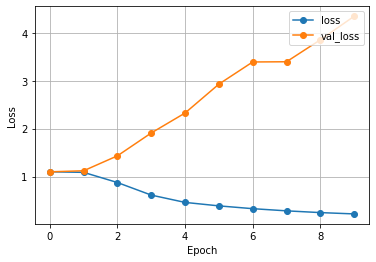

In [34]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')